In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
Wzx = np.matrix('-0.5, 0, 0, 0; \
                -0.3536 -0.3536 0 0; \
                0 0.5 0 0; \
                0.3536 0.3536 0 0;\
                0.5 0 0 0;\
                0.3536 -0.3536 0 0;\
                0 -0.5 0 0; \
                -0.3536 -0.3536 0 0')

Wax = np.matrix('0 0 1 1; 0 0 1 1;\
                0 0 1 1; 0 0 1 1;\
                0 0 1 1; 0 0 1 1;\
                0 0 1 1; 0 0 1 1')

Wbx = np.matrix('0 0 1 0; 0 0 1 0;\
                0 0 1 0; 0 0 1 0;\
                0 0 1 0; 0 0 1 0;\
                0 0 1 0; 0 0 1 0')

num = np.cos(np.pi / 4)
Wyy = np.matrix([[1, num, 0, -num, -1, -num, 0, num],
                [num, 1, num, 0, -num, -1, -num, 0],
                [0, num, 1, num, 0, -num, -1, -num],
                [-num, 0, num, 1, num, 0, -num, -1],
                [-1, -num, 0, num, 1, num, 0, -num],
                [-num, -1, -num, 0, num, 1, num, 0],
                [0, -num, -1, -num, 0, num, 1, num],
                [num, 0, -num, -1, -num, 0, num, 1]])



Way = 0
Wby = 0
cz = 0
ca = 0
cb = 0
cy = 0

# Time constants in ms
ta = 10 
tb = 10
ty = 10
dt = 10

In [3]:
U,V = np.linalg.eig(Wyy/4)

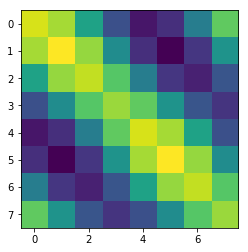

In [4]:
A = V * np.diag(U) * V.T
plt.imshow(A)
plt.show()

In [5]:
b = np.matrix([-1,2,-3])
c = np.matrix([2,3,4])
np.multiply(b,c)

matrix([[ -2,   6, -12]])

In [74]:
posx = [0.0] * 25 + [0.2] * 75 + [0.0] * 300
posy = [0.0] * 25 + [-0.5] * 75 + [0.0] * 300
begin = [1.0] * 75 + [0.0] * 325
delay = [0.0] * 300 + [1.0] * 25 + [0.0] * 75

x_mat = np.matrix([posx, posy, begin, delay])




#zmat = [z]

In [67]:
yhat = Wyy * y + cy
da = dt / ta * (-a + Wax * x_mat[:,0] + Way * y + ca)
a += da

In [138]:
Wyy = Wyy / 4

In [69]:
yhat = Wyy * y + cy

In [153]:
U,V=np.linalg.eig(Wyy)

In [165]:

#np.linalg.eig?

matrix([[-0.8660254 ],
        [ 0.20412415],
        [ 0.        ],
        [-0.20412415],
        [-0.28867513],
        [-0.20412415],
        [ 0.        ],
        [ 0.20412415]])

In [71]:
dt / ty * (-y + np.multiply(bp / (1 + bp),  z) + \
                    np.multiply((1 / (1 + ap)), yhat)) 

matrix([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]])

In [150]:
y = np.matrix([0.0] * 8).T
a = np.matrix([0.0] * 8).T
b = np.matrix([0.0] * 8).T
y = np.matrix([0.0] * 8).T

ymat = [y.copy()]
amat = [a.copy()]
bmat = [b.copy()]
ymat = [y.copy()]
zmat = []

for i in range(200):
    z = Wzx * x_mat[:, i]
    yhat = Wyy * y + cy
    da = dt / ta * (-a + Wax * x_mat[:,i] + Way * y + ca)
    a += da
    
    #print(np.sum(a))
    #import pdb; pdb.set_trace()
    #from IPython.core.debugger import Tracer; Tracer()()
    
    
    db = dt / tb * (-b + Wbx * x_mat[:,i] + Wby * y + cb)
    b += db
    
    bp =  np.maximum(b, 0)
    ap = np.maximum(a, 0)
    
    dy = dt / ty * (-y + np.multiply(bp / (1 + bp),  z) + \
                    np.multiply((1 / (1 + ap)), yhat)) 
    y += dy
    
    amat.append(a.copy())
    #print(np.sum(amat))
    bmat.append(b.copy())
    ymat.append(y.copy())
    zmat.append(z.copy())

Amat = np.hstack(amat)
Bmat = np.hstack(bmat)
Ymat = np.hstack(ymat)
Zmat = np.hstack(zmat)

In [173]:
U

array([  0.00000000e+00,   1.00000000e+00,   1.11022302e-16,
         1.00000000e+00,   3.70979828e-17,  -4.17800153e-17,
         1.37562494e-17,   3.33783434e-33])

In [172]:
np.linalg.norm(V[:,3])

0.99999999999999989

In [174]:
Wyy * V[:,3]

matrix([[-0.09115061],
        [-0.41208202],
        [-0.49162136],
        [-0.28317558],
        [ 0.09115061],
        [ 0.41208202],
        [ 0.49162136],
        [ 0.28317558]])

In [171]:
Wyy * y / np.linalg.norm(y)

matrix([[-0.09804978],
        [-0.41602046],
        [-0.490292  ],
        [-0.27735713],
        [ 0.09804978],
        [ 0.41602046],
        [ 0.490292  ],
        [ 0.27735713]])

In [160]:
y / np.linalg.norm(y)

matrix([[-0.09804978],
        [-0.41602046],
        [-0.490292  ],
        [-0.27735713],
        [ 0.09804978],
        [ 0.41602046],
        [ 0.490292  ],
        [ 0.27735713]])

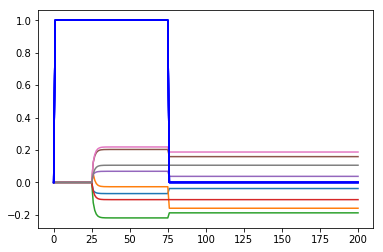

In [152]:
plt.plot(Ymat.T);
plt.plot(Amat.T, 'b');

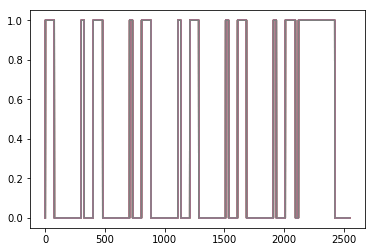

In [123]:
plt.plot(Amat.T);

In [108]:
Ymat

matrix([[-0.61247528,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        , -0.05      , -0.08749835, -0.16249506, -0.31248846,
         -0.61247528],
        [-2.3335153 ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.05304   , -0.10606369, -0.42427106, -1.06068581,
         -2.3335153 ],
        [-2.93762359,  0.        ,  0.        ,  0.        ,  0.  

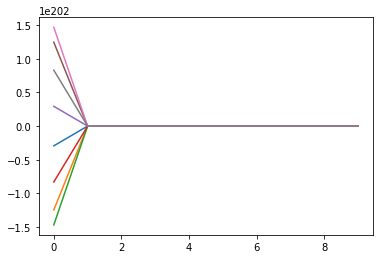

In [83]:
plt.plot(Ymat[:,:10].T);

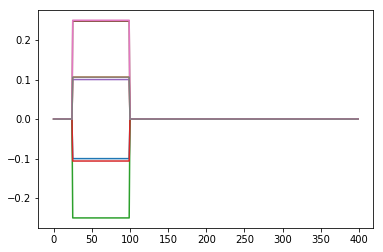

In [56]:
plt.plot(Zmat.T);

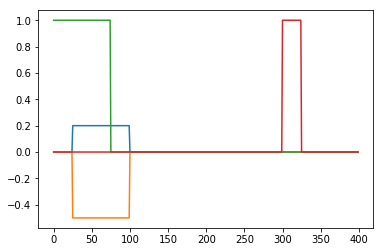

In [9]:
plt.plot(x_mat.T);

In [10]:
da

matrix([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]])

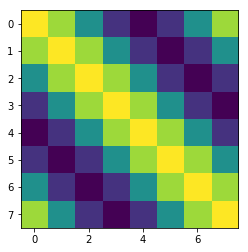

In [11]:
plt.imshow(Wyy)
plt.show()